<a href="https://colab.research.google.com/github/Akankshaxnegi/CODSOFT_TASK-1/blob/main/Titanic_Survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK-1 :  TITANIC  SURVIVAL  PREDICTION

AUTHOR :  AKANKSHA  NEGI

BATCH : SEPTEMBER

DOMAIN : DATA  SCIENCE

In [ ]:
# IMPORTING LIBRARIES

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# DATA COLLECTION & PROCESSING

In [6]:
# loading the data from csv file to Pandas DataFrame
titanic_data = pd.read_csv("/content/tested.csv")

In [7]:
# printing the first five rows of the DataFrame
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
# Number of rows & columns
titanic_data.shape

(418, 12)

In [9]:
# Some information related to data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [10]:
# count of the surviving people (0 = non-survive 1 = survive)
titanic_data['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

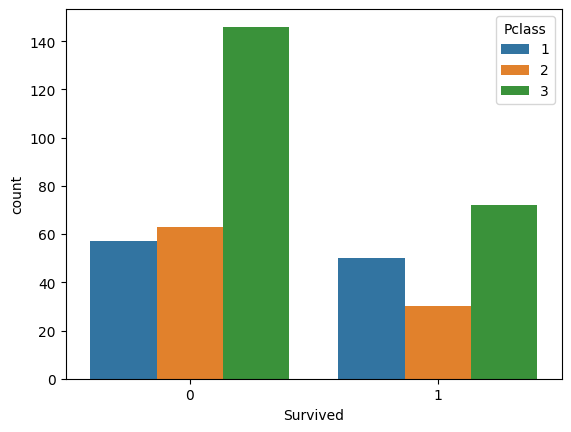

In [11]:
# Visualizing the count of survivals with Pclass
sns.countplot(x=titanic_data['Survived'], hue= titanic_data['Pclass'])

In [12]:
# knowing the Sex (gender) column
titanic_data['Sex']

0        male
1      female
2        male
3        male
4      female
        ...  
413      male
414    female
415      male
416      male
417      male
Name: Sex, Length: 418, dtype: object

<Axes: xlabel='Survived', ylabel='count'>

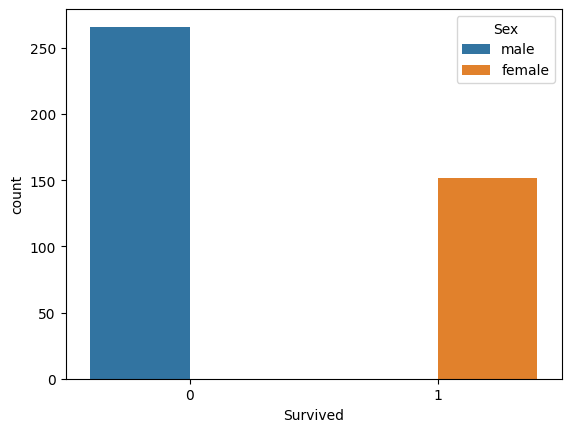

In [13]:
# Visualizing the count survival with Sex(Gender)
sns.countplot(x=titanic_data['Survived'], hue= titanic_data['Sex'])

In [14]:
# Looking at the survival Rate by Sex
titanic_data.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,1.0
male,0.0


In [15]:
# Converting the Sex(Gender) column into Numeric form
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
titanic_data['Sex'] = labelencoder.fit_transform(titanic_data['Sex'])
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


<Axes: xlabel='Sex', ylabel='count'>

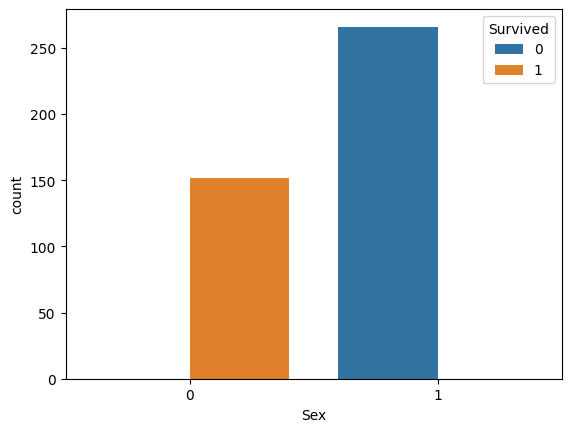

In [16]:
# Observation:- Proof  by visualisation i.e, (male(0) = non-survive , female (1)= survive)
sns.countplot(x=titanic_data['Sex'], hue= titanic_data['Survived'])

In [17]:
# Observing the missing values
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [18]:
# Dropping the Age column
titanic_data= titanic_data.drop(['Age'], axis = 1)

In [19]:
# Looking at the final data after dropping Age column
titanic_data_final = titanic_data
titanic_data_final.head(10)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",1,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",1,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",1,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",1,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",1,2,0,A/4 48871,24.1500,NaN,S


**MODEL TRAINING**

In [20]:
# Vital columns i.e, Pclass & Sex
a = titanic_data[['Pclass','Sex']]
b = titanic_data['Survived']

In [21]:
# Splitting the dataset into two parts (80% testing , 20% training)
from sklearn.model_selection import train_test_split
a_train , a_test , b_train , b_test = train_test_split(a,b,test_size = 0.2 , random_state = 0)

In [22]:
# Using for the purpose of Training
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 0)
log.fit(a_train , b_train)

LogisticRegression(random_state=0)

**MODEL PREDICTION**

In [23]:
# using the predict for the prediction purpose
pre = print(log.predict(a_test))

[0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0
 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1
 1 0 0 1 0 1 0 1 0 0]


In [24]:
# Checking the above prediction is right or not i.e, whether the passenger has survived or not
print(b_test)

360    0
170    0
224    1
358    0
309    1
      ..
100    1
7      0
22     1
68     0
328    0
Name: Survived, Length: 84, dtype: int64


In [25]:
# Using the argument with the viewer perspective
import warnings
warnings.filterwarnings("ignore")
res = log.predict([[2,0]])                              # parameter (2=pclass , Sex ( 0= female))
if(res == 0):
  print("NOT SURVIVED ! ")
else:
  print("SURVIVED !")


SURVIVED !


**CONCLUSION:-**
This Titanic Survival Prediction Dataset is able to analysis that whether the passenger had survived or not .